## London boroughs Housing prices:

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.



## The Data Science Pipeline

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

# Load the ticker collection from matplotlib for ticker fine tuning:
from matplotlib.ticker import FormatStrFormatter


#### 1.2.  Loading the data
Our data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [16]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
# change index_col from None to 0 so we can have first column as index (Datetime)
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= 0)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [17]:
# Check the shape of properties:
properties.shape

(309, 48)

In [18]:
# Check the sumary of properties df:
properties.info()

# Check the top 5 rows of properties df:
properties.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, NaT to 2020-08-01
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City of London        309 non-null    object 
 1   Barking & Dagenham    309 non-null    object 
 2   Barnet                309 non-null    object 
 3   Bexley                309 non-null    object 
 4   Brent                 309 non-null    object 
 5   Bromley               309 non-null    object 
 6   Camden                309 non-null    object 
 7   Croydon               309 non-null    object 
 8   Ealing                309 non-null    object 
 9   Enfield               309 non-null    object 
 10  Greenwich             309 non-null    object 
 11  Hackney               309 non-null    object 
 12  Hammersmith & Fulham  309 non-null    object 
 13  Haringey              309 non-null    object 
 14  Harrow                309 non-null    object 
 15  Havering   

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [19]:
# changing the shape of properties df by calling .tranpose():
properties_T = properties.transpose()

In [20]:
# Check the shape of properties df:
properties.shape

(309, 48)

In [21]:
# Check the shape of properties_T df:
properties_T.shape

(48, 309)

In [22]:
# Check the top 5 rows of properties_T df:
properties_T.head()

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,73789.5,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


In [23]:
# Check the bottom 5 rows of properties_T df:
properties_T.tail()

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01
LONDON,E12000007,74435.8,72777.9,73896.8,74455.3,75432,75606.2,75984.2,75529.3,74940.8,...,468983,478576,478489,479628,488185,480425,479018,482227,485010,489159
SOUTH EAST,E12000008,64018.9,63715,64113.6,64623.2,64530.4,65511,65224.9,64851.6,64352.5,...,322512,321972,323422,319827,326701,327413,324659,324398,327057,332147
SOUTH WEST,E12000009,54705.2,54356.1,53583.1,54786,54698.8,54420.2,54265.9,54365.7,54244,...,256875,256577,257822,257101,262444,255891,261006,261222,264824,264886
Unnamed: 47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England,E92000001,53202.8,53096.2,53201.3,53590.9,53678.2,53735.2,53900.6,53600.3,53309.2,...,247951,248250,248950,248232,251539,250874,251973,252432,254310,256109


In [24]:
# Check the sumary of properties df:
properties_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, City of London to England
Columns: 309 entries, NaT to 2020-08-01
dtypes: object(309)
memory usage: 117.5+ KB


In [25]:
# Check the columns Tables:
properties_T.columns.unique()

DatetimeIndex([       'NaT', '1995-01-01', '1995-02-01', '1995-03-01',
               '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01',
               '1995-08-01', '1995-09-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', length=309, freq=None)

**2.2. Cleaning the data**

Let's first transpose our dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

In [26]:
# Check the column's lables by calling .unique():
properties_T.columns.unique()

DatetimeIndex([       'NaT', '1995-01-01', '1995-02-01', '1995-03-01',
               '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01',
               '1995-08-01', '1995-09-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', length=309, freq=None)

In [29]:
#Give Column[0] a new lablel name called "ID":
properties_T.rename(columns = {list(properties_T)[0]: 'ID'}, inplace = True)

In [30]:
# Check the top 5 rows of properties_T df:
properties_T.head()

,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,73789.5,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


In [31]:
# reset the index by calling .reset_index():
properties_T_1 = properties_T.reset_index()

In [32]:
# Check the top 5 rows of properties_T df:
properties_T_1.head()

,index,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
4,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


**2.3. Cleaning the data (part 2)**

We might have to **rename** a couple columns. 

In [35]:
#Give Column[0] a new lablel name called "ID":
properties_T_1.rename(columns = {list(properties_T_1)[0]: 'Districts'}, inplace = True)

In [37]:
# Check the top 5 rows of properties_T_1 df:
properties_T_1.head()

,Districts,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,776894,737275,747611,777640,844989,867841,899831,938833,852151,814665
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
4,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


**2.4.Transforming the data**

Let's now **melt** our DataFrame:

In [38]:
clean_properties = pd.melt(properties_T_1, id_vars= ['Districts', 'ID'], var_name= 'Date', value_name= 'Price')

Let's make sure that all column data types are all correct. Average prices, for example, should be floating point numbers... 

In [39]:
# Check the shape of clean_properties df:
clean_properties.shape

(14784, 4)

In [41]:
# Check the top 5 rows of clean_properties df:
clean_properties.head()

,Districts,ID,Date,Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [40]:
# Check the summary of clean_properties df:
clean_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Districts  14784 non-null  object        
 1   ID         13860 non-null  object        
 2   Date       14784 non-null  datetime64[ns]
 3   Price      13860 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 462.1+ KB


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? let's keep in mind that there are only 32 London Boroughs. How many entries do we have in that column? 

So now let's check out the contents of the London Borough column, and if we find null values, let's get rid of them!!

In [46]:
clean_properties.head()

,Districts,ID,Date,Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [47]:
# Check the summary of clean_properties df:
clean_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Districts  14784 non-null  object        
 1   ID         13860 non-null  object        
 2   Date       14784 non-null  datetime64[ns]
 3   Price      13860 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 462.1+ KB


In [48]:
#As shown from above, Price Columns are all oject so this needs to be converted into a float: 
# first, create a muulti-index, including 'Date', 'Districts', 'ID': 
clean_properties_index = clean_properties.set_index(['Date', 'Districts', 'ID'])

In [49]:
# Check the top 5 rows of clean_properties_index df:
clean_properties_index.head()

Price
Date       Districts          ID                
1995-01-01 City of London     E09000001    91449
           Barking & Dagenham E09000002  50460.2
           Barnet             E09000003  93284.5
           Bexley             E09000004  64958.1
           Brent              E09000005  71306.6

In [50]:
#convert Price Object to floatusing apply() as follow: 
clean_properties_float = clean_properties_index.apply(pd.to_numeric)

In [52]:
# Check the top 5 rows of clean_properties_float df:
clean_properties_float.head()

Price
Date       Districts          ID                    
1995-01-01 City of London     E09000001  91448.98487
           Barking & Dagenham E09000002  50460.22660
           Barnet             E09000003  93284.51832
           Bexley             E09000004  64958.09036
           Brent              E09000005  71306.56698

In [53]:
# Check the summary of clean_properties_float df:
clean_properties_float.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14784 entries, (Timestamp('1995-01-01 00:00:00'), 'City of London', 'E09000001') to (Timestamp('2020-08-01 00:00:00'), 'England', 'E92000001')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   13860 non-null  float64
dtypes: float64(1)
memory usage: 176.5+ KB


In [54]:
#Reset the index:
clean_properties_f_1 = clean_properties_float.reset_index()

In [55]:
# Check the top 5 rows of clean_properties_f_1 df:
clean_properties_f_1.head()

,Date,Districts,ID,Price
0,1995-01-01,City of London,E09000001,91448.98487
1,1995-01-01,Barking & Dagenham,E09000002,50460.22660
2,1995-01-01,Barnet,E09000003,93284.51832
3,1995-01-01,Bexley,E09000004,64958.09036
4,1995-01-01,Brent,E09000005,71306.56698


In [56]:
# Check the summary of clean_properties_f_1 df to make sure that Price datatype is float:
clean_properties_f_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14784 non-null  datetime64[ns]
 1   Districts  14784 non-null  object        
 2   ID         13860 non-null  object        
 3   Price      13860 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 462.1+ KB


In [57]:
# Check the unique columns labels to see which columns are part of London Borough:
clean_properties_f_1['Districts'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [62]:
# assign NON_London_Borough to the Boroughs which are not part of london Borough:
NON_London_Borough = ['City of London', 'Inner London', 'Outer London', 'NORTH EAST','NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'England']

In [67]:
# Drop NON_London_Borough from clean_properties_f_1 using .isin() and keeping only the London Borough =32: 
clean_properties_f_2 = clean_properties_f_1[~clean_properties_f_1.Districts.isin(NON_London_Borough)]


In [71]:
# confirm that we have now  only the London Borough =32: 
clean_properties_f_2['Districts'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], dtype=object)

In [72]:
# Check the NAN columns: 
clean_properties_f_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10780 entries, 1 to 14782
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10780 non-null  datetime64[ns]
 1   Districts  10780 non-null  object        
 2   ID         9856 non-null   object        
 3   Price      9856 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 421.1+ KB


In [73]:
# drops all NAN columns using .dropna() Method:
clean_properties_drop_NAN = clean_properties_f_2.dropna(how='any')

In [77]:
# confirm that we have no NAN columns & we have only 32 boroughs:
clean_properties_drop_NAN['Districts'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [80]:
# assign clean_properties_drop_NAN to df:
df = clean_properties_drop_NAN

In [81]:
# Check the top 5 rows of df:
df.head()

,Date,Districts,ID,Price
1,1995-01-01,Barking & Dagenham,E09000002,50460.22660
2,1995-01-01,Barnet,E09000003,93284.51832
3,1995-01-01,Bexley,E09000004,64958.09036
4,1995-01-01,Brent,E09000005,71306.56698
5,1995-01-01,Bromley,E09000006,81671.47692


In [82]:
#let's rename 'Date' as 'Month' and 'Price' as 'Average_Price':
df.rename(columns = {list(df)[0]: 'Month', list(df)[3]: 'Average_Price'}, inplace = True)

C:\Users\aktha\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
# Check the top 5 rows of df:
df.head()

,Month,Districts,ID,Average_Price
1,1995-01-01,Barking & Dagenham,E09000002,50460.22660
2,1995-01-01,Barnet,E09000003,93284.51832
3,1995-01-01,Bexley,E09000004,64958.09036
4,1995-01-01,Brent,E09000005,71306.56698
5,1995-01-01,Bromley,E09000006,81671.47692


**2.6. Visualizing the data**



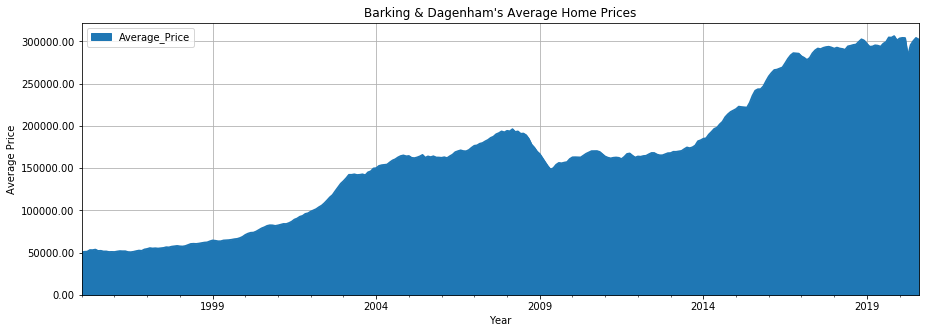

In [84]:
ax1 = df[df['Districts'] == 'Barking & Dagenham'].plot(kind='area', x='Month', y='Average_Price', figsize=(15, 5), grid=True)
plt.title("Barking & Dagenham's Average Home Prices")
plt.ylabel("Average Price")   
plt.xlabel("Year")   
ax1.set_axisbelow(True) 
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

To limit the number of data points we have, let's extract the year from every month value .. *Month* column. 

To do this, let's apply a ***lambda function***. the logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

let's make sure that this will help us answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [85]:
# lambda function here we go: 
df['Year'] = df['Month'].apply(lambda t: t.year)

# Call the tail() method on df
df.tail()

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Month,Districts,ID,Average_Price,Year
14764,2020-08-01,Sutton,E09000029,383366.6747,2020
14765,2020-08-01,Tower Hamlets,E09000030,461691.6301,2020
14766,2020-08-01,Waltham Forest,E09000031,451536.7441,2020
14767,2020-08-01,Wandsworth,E09000032,616711.0200,2020
14768,2020-08-01,Westminster,E09000033,963725.1718,2020


In [86]:
# Using the function 'groupby' will help you to calculate the mean for each year and for each Borough. 
## As you can see, the variables Borough and Year are now indices
dfg = df.groupby(by=['Districts', 'Year']).mean()
dfg.sample(10)

,,Average_Price
Districts,Year,
Merton,2011,306063.018325
Waltham Forest,2008,232886.473042
Haringey,2000,145997.085533
Hackney,2010,300490.890992
Croydon,2003,185784.025417
Richmond upon Thames,1997,136656.271017
Ealing,1997,97805.824543
Sutton,2004,201829.271908
Hillingdon,2003,202707.807350


In [87]:
# reset index and calling head() method:
dfg = dfg.reset_index()
dfg.head()

,Districts,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


In [88]:
#slicing dfg to have more understanding of the df:
dfg[(dfg['Districts'] == 'Kensington & Chelsea') & (dfg['Year'] == 1995)]


,Districts,Year,Average_Price
491,Kensington & Chelsea,2018,1.363880e+06


In [89]:
dfg[(dfg['Districts'] == 'Kensington & Chelsea') & (dfg['Year'] == 2018)]

,Districts,Year,Average_Price
491,Kensington & Chelsea,2018,1.363880e+06


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

Let's make sure that the function will:

1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once done, this function, should help us to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.



In [92]:
# Here's where you should write your function:
def create_price_ratio(d):
    y1998 = float(d['Average_Price'][d['Year']==1998])
    y2018 = float(d['Average_Price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio

In [93]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
create_price_ratio(dfg[dfg['Districts']=='Barking & Dagenham'])

[4.89661861291754]

In [94]:
# We want to do this for all of the London Boroughs. 
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique London_Borough.
final = {}

In [95]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['Districts'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['Districts'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.0947846853338765], 'Camden': [4.935353408884261], 'Croydon': [4.201100280024767], 'Ealing': [4.311450902121834], 'Enfield': [4.26347158349581], 'Greenwich': [4.763036347329193], 'Hackney': [6.198285561008662], 'Hammersmith & Fulham': [4.137798101936229], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335308], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802298], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514063], 'Lewisham': [5.449221041059685], 'Merton': [4.741273313294604], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379376], 'Sutton': [4.118522608573157], 'Tower Hamlets': [4.6267010400611

In [96]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

In [97]:
# Call the head() method on this variable to check it out. 
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,4.2011,4.311451,4.263472,4.763036,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [98]:
df_ratios_T = df_ratios.transpose()

In [99]:
df_ratios_T.head()

,0
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554
Bromley,4.094785


In [100]:
#Reset the index and call head() method:
df_ratios_T = df_ratios_T.reset_index()
df_ratios_T.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [103]:
df_ratios_T.rename(columns = {list(df_ratios_T)[0]: 'Borough', list(df_ratios_T)[1]: '2018'}, inplace = True)

In [104]:
df_ratios_T.head()

,Borough,2018
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [105]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top = df_ratios_T.sort_values(by='2018',ascending=False).head(33)
print(top)

                 Borough      2018
10               Hackney  6.198286
29        Waltham Forest  5.834756
26             Southwark  5.516485
21              Lewisham  5.449221
31           Westminster  5.353565
23                Newham  5.305390
12              Haringey  5.134625
18  Kensington & Chelsea  5.082465
20               Lambeth  4.957751
5                 Camden  4.935353
0     Barking & Dagenham  4.896619
3                  Brent  4.894554
17             Islington  4.844048
9              Greenwich  4.763036
30            Wandsworth  4.757709
22                Merton  4.741273
28         Tower Hamlets  4.626701
24             Redbridge  4.471182
1                 Barnet  4.358196
14              Havering  4.325230
7                 Ealing  4.311451
19  Kingston upon Thames  4.270550
8                Enfield  4.263472
2                 Bexley  4.248977
6                Croydon  4.201100
15            Hillingdon  4.200273
11  Hammersmith & Fulham  4.137798
27                Su

In [106]:
top['Borough'].unique()

array(['Hackney', 'Waltham Forest', 'Southwark', 'Lewisham',
       'Westminster', 'Newham', 'Haringey', 'Kensington & Chelsea',
       'Lambeth', 'Camden', 'Barking & Dagenham', 'Brent', 'Islington',
       'Greenwich', 'Wandsworth', 'Merton', 'Tower Hamlets', 'Redbridge',
       'Barnet', 'Havering', 'Ealing', 'Kingston upon Thames', 'Enfield',
       'Bexley', 'Croydon', 'Hillingdon', 'Hammersmith & Fulham',
       'Sutton', 'Bromley', 'Harrow', 'Richmond upon Thames', 'Hounslow'],
      dtype=object)

[Text(0, 0, 'Hackney'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Westminster'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Kensington & Chelsea'),
 Text(0, 0, 'Lambeth'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Barking & Dagenham'),
 Text(0, 0, 'Brent'),
 Text(0, 0, 'Islington'),
 Text(0, 0, 'Greenwich'),
 Text(0, 0, 'Wandsworth'),
 Text(0, 0, 'Merton'),
 Text(0, 0, 'Tower Hamlets'),
 Text(0, 0, 'Redbridge'),
 Text(0, 0, 'Barnet'),
 Text(0, 0, 'Havering'),
 Text(0, 0, 'Ealing'),
 Text(0, 0, 'Kingston upon Thames'),
 Text(0, 0, 'Enfield'),
 Text(0, 0, 'Bexley'),
 Text(0, 0, 'Croydon'),
 Text(0, 0, 'Hillingdon'),
 Text(0, 0, 'Hammersmith & Fulham'),
 Text(0, 0, 'Sutton'),
 Text(0, 0, 'Bromley'),
 Text(0, 0, 'Harrow'),
 Text(0, 0, 'Richmond upon Thames'),
 Text(0, 0, 'Hounslow')]

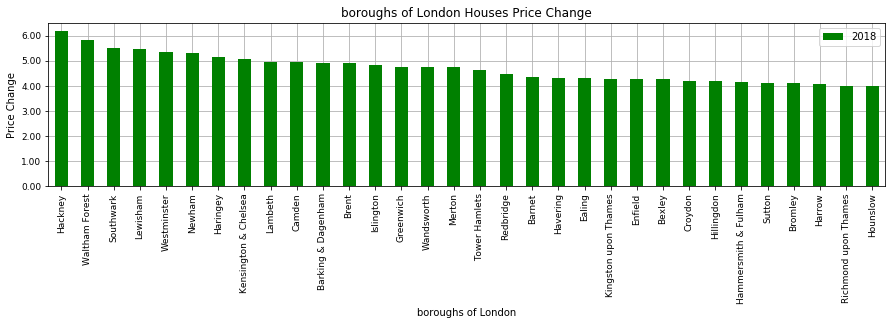

In [107]:
ax = top[['Borough', '2018']].plot(kind='bar', figsize=(15,3), rot=90, grid=True, colormap='ocean', title='boroughs of London Houses Price Change')
plt.xlabel('boroughs of London')
plt.ylabel('Price Change')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax.set_axisbelow(True) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xticklabels(top.Borough)

### 4. Conclusion

#### ✰ Hackney has shown the greatest price change among all London boroughs with ~6.2% compared 1995 with 2018.

#### ✰ From 1995 till 2015, Hackney has shown the highest demands due to:
   * Affordability: Low house prices compared to other London Boroughs (Affordable by middle class).
   * Easy Access to the city of London.
   * Explosion of new developments and boutique-style businesses.
   * Big demand spike in 2012 only in Hackney, after the 2008 Financial crisis, mainly because it was one of the 5 cities in   
     London hosting the Olympic Games in 2012.

#### ✰ From 2015 till now, all London borough have shown a decline in house sales: 
After analyzing both the Average Price and the Sales Volume sheets we can conclude that when the demand curve for housing increases, so too do prices. It makes sense: If more people want something than is available for purchase (Low. supply), then they are willing to pay more for that product. As prices increase, demand generally drops, as affordability decreases

#### ✰ There are so many factors that can affect the supply and demand for housing, and many aren't economic in nature. 
Consider the current COVID-19 pandemic, which grounded constructions, paused home sales for a period, and caused building materials to be intermittently (un)available. That certainly put significant downward pressure on housing supply and demand. Or, consider a local government that wants to encourage urban growth and opens up new urban land for development that will increase supply as inward migration increases demand. So as a conclusion, we can not look at only the price increase change without looking at many different factors that affect housing market supply and demand like in our example the Sale volumes.






In [183]:
"""
Now to have better understanding let's look at 2 things: 
(1) average prices for the top 14 London Boroughs
(2) Sales Volume
"""
dfg.head(10)

,Districts,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441
5,Barking & Dagenham,2000,77549.513290
6,Barking & Dagenham,2001,88664.058223
7,Barking & Dagenham,2002,112221.912482
8,Barking & Dagenham,2003,142498.927800
9,Barking & Dagenham,2004,158175.982483


In [109]:
Average_Price = dfg.set_index('Year')

In [110]:
Average_Price.head()

,Districts,Average_Price
Year,,
1995,Barking & Dagenham,51817.969390
1996,Barking & Dagenham,51718.192690
1997,Barking & Dagenham,55974.262309
1998,Barking & Dagenham,60285.821083
1999,Barking & Dagenham,65320.934441


In [111]:
pivot = Average_Price.pivot_table(index='Year', columns='Districts', values='Average_Price')

In [112]:
pivot.head()

Districts,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,
1995,51817.969390,91792.537433,64291.532845,73029.841840,81967.316732,120367.431783,68923.340845,81218.674792,71984.234888,63389.786578,...,80500.752648,54574.226405,72580.490579,109892.274008,64260.053745,70291.304638,63652.446010,61279.980463,88829.083075,133689.233033
1996,51718.192690,94000.445448,65490.417234,75235.918367,83547.483632,133810.487933,69713.920086,83389.914491,74062.012957,65186.781770,...,83999.034578,55747.012583,75358.658939,117307.882658,70117.306851,71651.920030,70094.724437,62177.237897,92270.037989,139188.760342
1997,55974.262309,106883.185546,70789.406603,86749.070663,94224.688035,150142.901208,77674.269967,97805.824543,83609.439219,72067.770377,...,95699.209073,60971.380317,83371.972795,136656.271017,79725.850140,81094.119743,85759.562757,68228.785835,108108.356495,165447.591208
1998,60285.821083,122359.468033,80632.020822,100692.590417,108286.520467,170688.973933,88143.228830,111343.154650,93030.224322,81532.933366,...,108049.855117,67671.270763,94514.395822,162956.066025,91405.187779,92087.045921,96505.166407,75557.474132,125406.807233,190531.949942
1999,65320.934441,136004.512067,86777.715903,112157.469808,120874.179567,191090.697392,97173.322854,126278.342342,101986.993642,90879.131712,...,121901.372575,74525.568363,102940.450633,181772.319642,110267.545583,100869.813722,113035.289367,83821.587936,145339.809767,214042.702508


In [113]:
pivot.columns.unique()

Index(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
       'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon',
       'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames',
       'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='Districts')

In [114]:
Non_TOP_London_Districts = ['Barking & Dagenham', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hammersmith & Fulham', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Merton', 'Redbridge',
       'Richmond upon Thames', 'Sutton']

In [115]:
TOP_London_Districts = pivot.drop(Non_TOP_London_Districts, axis=1)

Text(0, 0.5, 'Average Price')

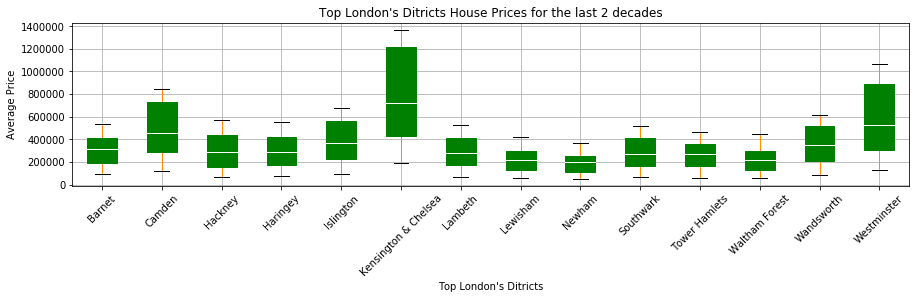

In [117]:
#Plot Average price for the top 13 London's borough against Hackney: 
# one thing to notice here is the very low (min value) of 1995 Avregae house price in Hackney (Appealing to middle class workers):
color = dict(boxes='Green', whiskers='DarkOrange', medians='White', caps='Black')
TOP_London_Districts.plot(kind='box', vert=True, figsize=(15, 3), grid=True, patch_artist=True, color=color, rot=45)
plt.title("Top London's Ditricts House Prices for the last 2 decades")
plt.xlabel("Top London's Ditricts")
plt.ylabel("Average Price")

Text(0, 0.5, 'Average House Price')

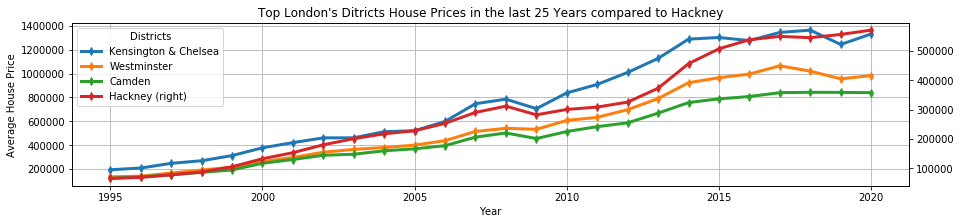

In [184]:
# Now let's plot top 3 Boroughs in terms of Prices against Hackney:
# Note that Hackney House Prices is plotted in the y-seoncdary axis to have better visibility:
ax2 = TOP_London_Districts[['Kensington & Chelsea', 'Westminster', 'Camden', 'Hackney']].plot(kind='line',style='d-', lw=3, ms=5, figsize=(15, 3), grid=True, secondary_y=['Hackney'])
plt.title("Top London's Ditricts House Prices in the last 25 Years compared to Hackney")
plt.xlabel("Year")
ax2.set_ylabel("Average House Price")

In [119]:
# (2) Sales Volume: to have more insights, let's read sheet_name='Sales Volume' from url_LondonHousePrices:
Volume = pd.read_excel(url_LondonHousePrices, sheet_name='Sales Volume', index_col= 0)

In [120]:
Volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 305 entries, NaT to 2020-06-01
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City of London        305 non-null    object 
 1   Barking & Dagenham    305 non-null    object 
 2   Barnet                305 non-null    object 
 3   Bexley                305 non-null    object 
 4   Brent                 305 non-null    object 
 5   Bromley               305 non-null    object 
 6   Camden                305 non-null    object 
 7   Croydon               305 non-null    object 
 8   Ealing                305 non-null    object 
 9   Enfield               305 non-null    object 
 10  Greenwich             305 non-null    object 
 11  Hackney               305 non-null    object 
 12  Hammersmith & Fulham  305 non-null    object 
 13  Haringey              305 non-null    object 
 14  Harrow                305 non-null    object 
 15  Havering   

In [121]:
Volume.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1995-01-01,17,96,332,269,233,323,198,375,303,327,...,5801,4489,3990,4199,5812,7506,8809,5050,NaN,47639
1995-02-01,7,95,327,207,220,326,194,342,242,302,...,6129,4349,4211,4633,5928,6873,8658,5113,NaN,47880
1995-03-01,14,144,384,318,320,449,207,447,377,437,...,8375,6149,5840,6262,8374,9639,12177,7157,NaN,67025
1995-04-01,7,109,304,253,249,362,174,377,270,337,...,6714,5338,4892,5218,7004,8053,10941,6359,NaN,56925


In [122]:
Volume.columns.unique()

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Inner London', 'Outer London', 'Unnamed: 37',
       'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [123]:
Non_top_sales = ['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington','Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton','Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Unnamed: 34', 'Inner London', 'Outer London', 'Unnamed: 37','NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST','SOUTH WEST', 'Unnamed: 47', 'England']

In [124]:
Volume_new = Volume.drop(Non_top_sales, axis=1)

In [125]:
Volume_new.head()

,Camden,Hackney,Kensington & Chelsea,Westminster
NaT,E09000007,E09000012,E09000020,E09000033
1995-01-01,198,131,324,339
1995-02-01,194,115,207,251
1995-03-01,207,159,318,365
1995-04-01,174,141,293,328


In [126]:
Volume_df = Volume_new.iloc[1:,:]

In [127]:
Volume_df.head()

,Camden,Hackney,Kensington & Chelsea,Westminster
1995-01-01,198,131,324,339
1995-02-01,194,115,207,251
1995-03-01,207,159,318,365
1995-04-01,174,141,293,328
1995-05-01,220,138,274,317


In [129]:
Volume_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304 entries, 1995-01-01 to 2020-06-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Camden                304 non-null    object
 1   Hackney               304 non-null    object
 2   Kensington & Chelsea  304 non-null    object
 3   Westminster           304 non-null    object
dtypes: object(4)
memory usage: 11.9+ KB


In [130]:
# Convert object datatype to float:
Volume_df_1 = Volume_df.apply(pd.to_numeric)

In [131]:
Volume_df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304 entries, 1995-01-01 to 2020-06-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Camden                304 non-null    int64
 1   Hackney               304 non-null    int64
 2   Kensington & Chelsea  304 non-null    int64
 3   Westminster           304 non-null    int64
dtypes: int64(4)
memory usage: 11.9 KB


In [132]:
# top 5 rows:
Volume_df_1.head()

,Camden,Hackney,Kensington & Chelsea,Westminster
1995-01-01,198,131,324,339
1995-02-01,194,115,207,251
1995-03-01,207,159,318,365
1995-04-01,174,141,293,328
1995-05-01,220,138,274,317


In [135]:
# reshape the df to have better visibility by calling resample the df yearly:
Volume_resample = Volume_df_1.resample('A').sum()

In [136]:
Volume_resample.head()

,Camden,Hackney,Kensington & Chelsea,Westminster
1995-12-31,2688,1709,3406,3923
1996-12-31,3528,2046,4271,4693
1997-12-31,3867,2775,4707,6314
1998-12-31,3542,2939,4081,5347
1999-12-31,3981,3065,5017,6643


In [138]:
Volume_resample.tail()

,Camden,Hackney,Kensington & Chelsea,Westminster
2016-12-31,2197,2456,1827,2627
2017-12-31,2195,2279,1565,2557
2018-12-31,1839,1998,1326,2088
2019-12-31,1540,2255,1354,1960
2020-12-31,480,456,413,496


In [141]:
# trim the df:
Volume_resample_final = Volume_resample.iloc[0:-2, :]

Text(0, 0.5, 'Sales Volume')

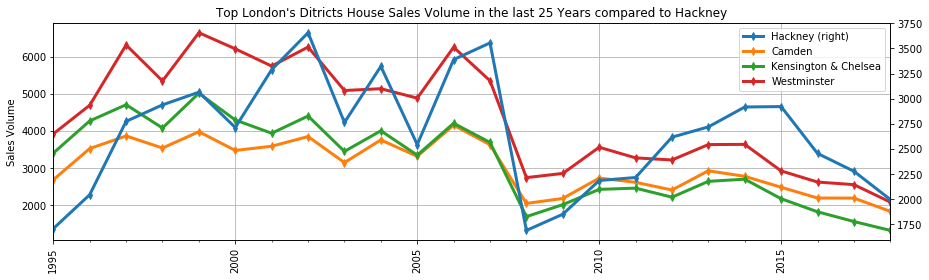

In [182]:
"""
Plot avergae sales volume for the top 3 boroughs against Hackeny:
Two things are really obvoius: 
(1) all Londons boroughs got a sharp decrease in sales folume during the 2008 financial crisis.
(2) The only London borough got a sharp rebound in terms of sales is "Hackney" 
"""
ax3 = Volume_resample_final[['Hackney', 'Camden', 'Kensington & Chelsea', 'Westminster']].plot(kind='line',style='d-', lw=3, ms=5, figsize=(15, 4), grid=True, rot=90, secondary_y=['Hackney'])
plt.title("Top London's Ditricts House Sales Volume in the last 25 Years compared to Hackney")
plt.xlabel("Year")
ax3.set_ylabel("Sales Volume")


After completing this project, we can now answer the main question "which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?" and the answer will be "Hackney".
For me as a Data Scientist I was to invetigate further to see if I can answer the other important question which is why? please check the presentation to reveal more information and invetigation beyond the scope of this project.